WNS Analytics Wizard 2018


In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Understanding the data

In [2]:
#read the data
data=pd.read_csv('/content/train_LZdllcl.csv')


In [3]:
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.shape

(54808, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

,count
int64,8
object,5
float64,1


In [7]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
data.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


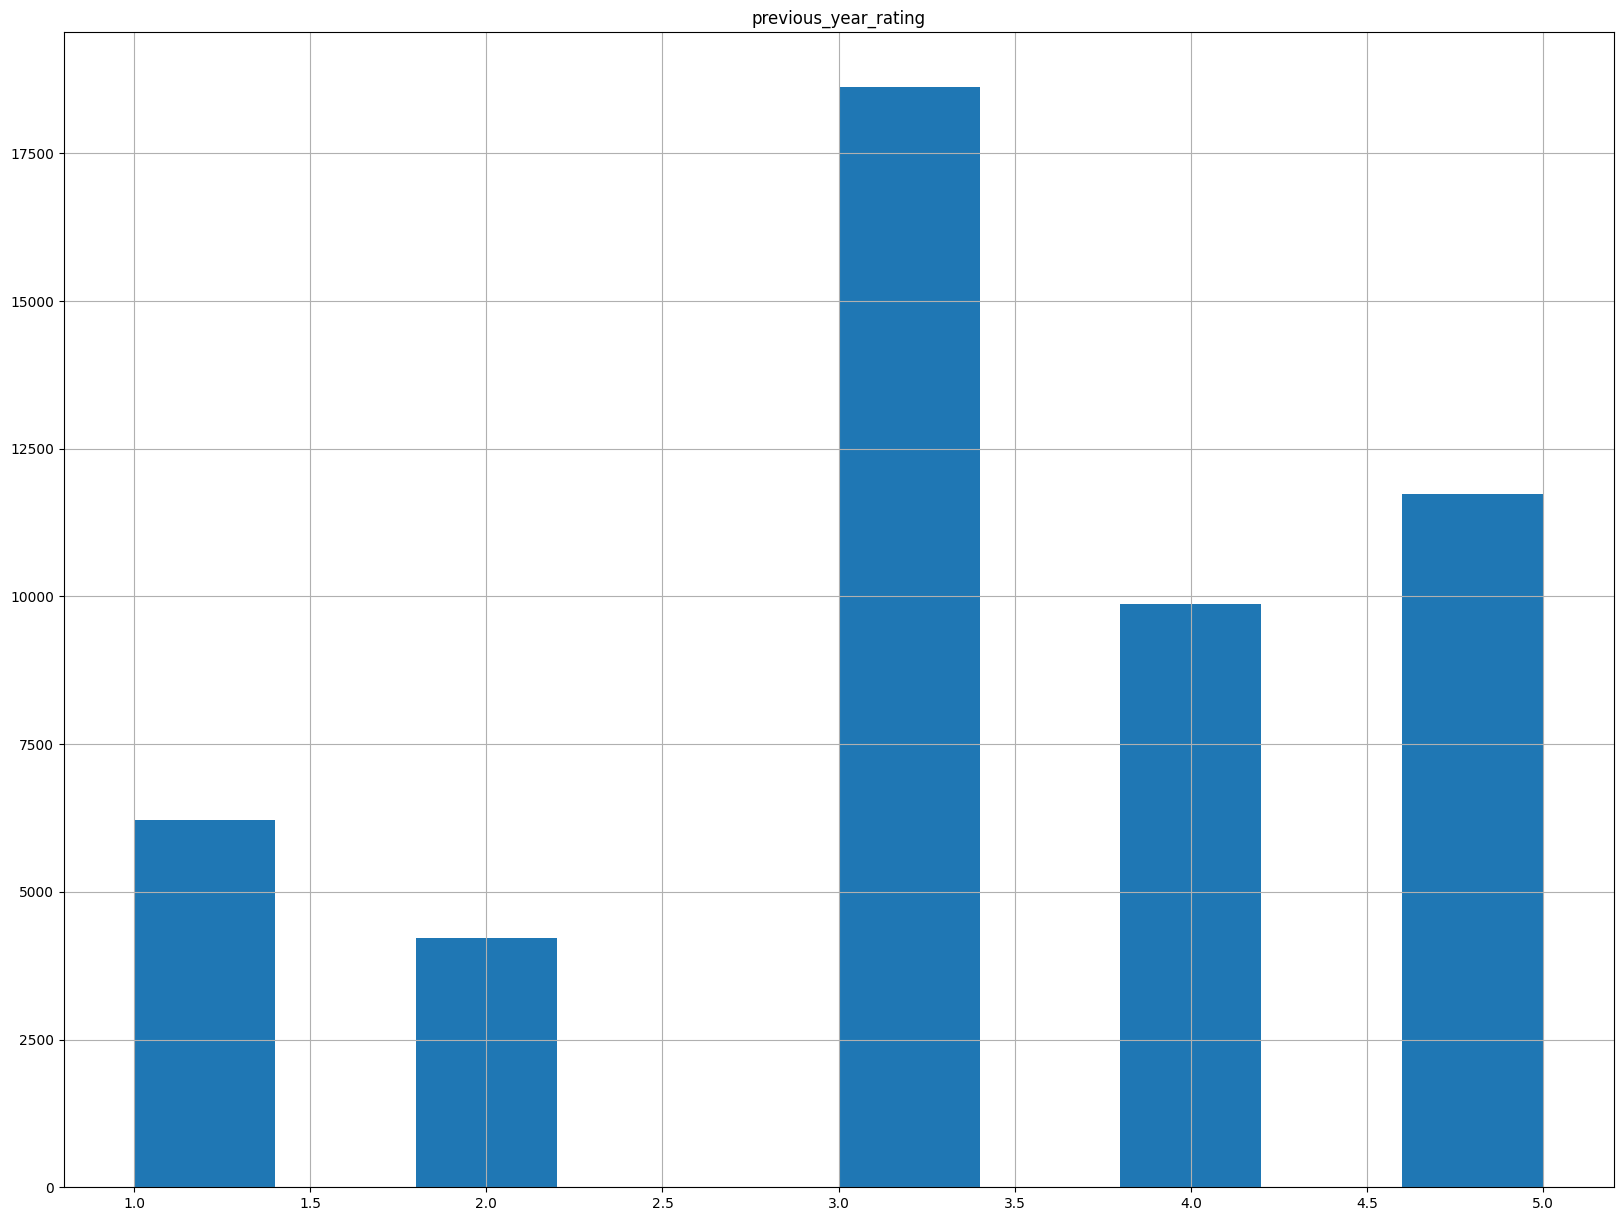

In [9]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [10]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

#Exploratory Data Analysis

**is_promoted- target column analysis**


In [11]:
data['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


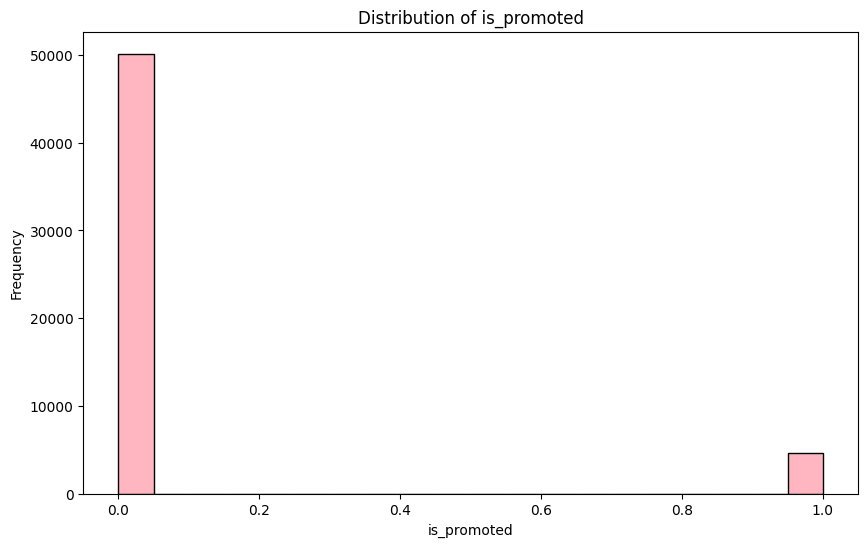

In [12]:
# Plotting is_promoted
is_promoted = data['is_promoted']

plt.figure(figsize = (10, 6))
plt.hist(is_promoted, bins = 20, color = 'lightpink', edgecolor = 'black')
plt.title('Distribution of is_promoted')
plt.xlabel('is_promoted')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Univariant analysis

<ipython-input-13-4d288322e20b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature],palette="viridis")
<ipython-input-13-4d288322e20b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature],palette="viridis")
<ipython-input-13-4d288322e20b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature],palette="viridis")
<ipython-input-13-4d288322e20b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

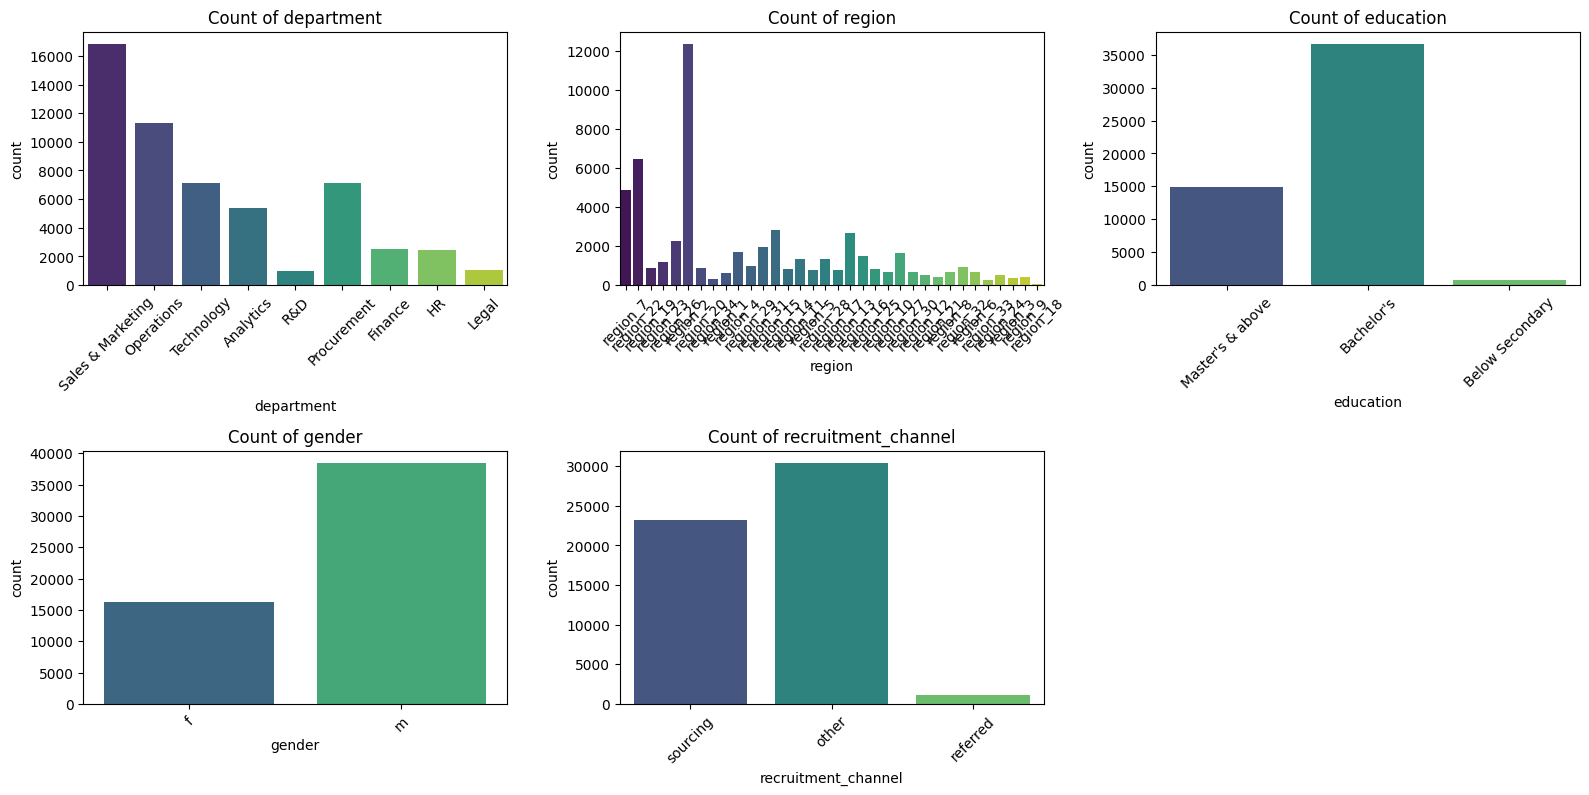

In [13]:
# List of categorical features
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Set up the matplotlib figure
plt.figure(figsize=(16, 24))

# Plot bar plots for categorical features
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=data[feature],palette="viridis")
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


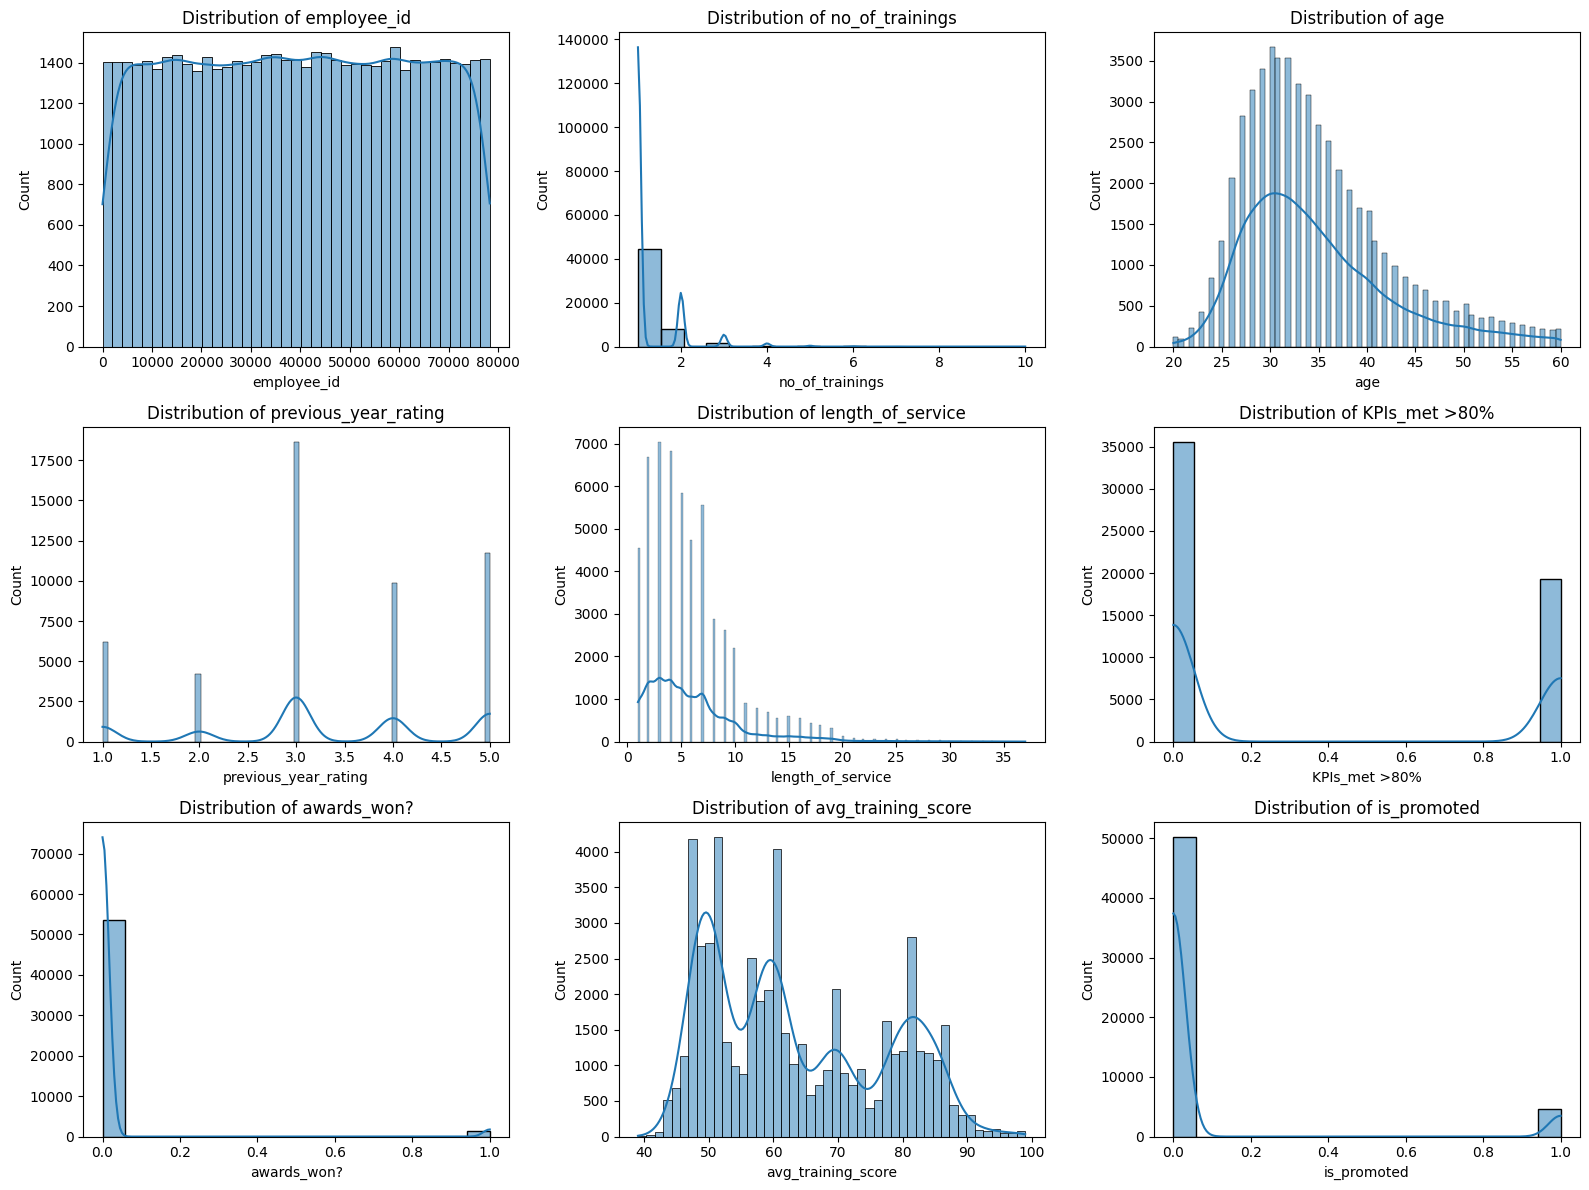

In [14]:
# List of numerical features
numerical_features = ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'is_promoted']

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


Bivariant Analysis

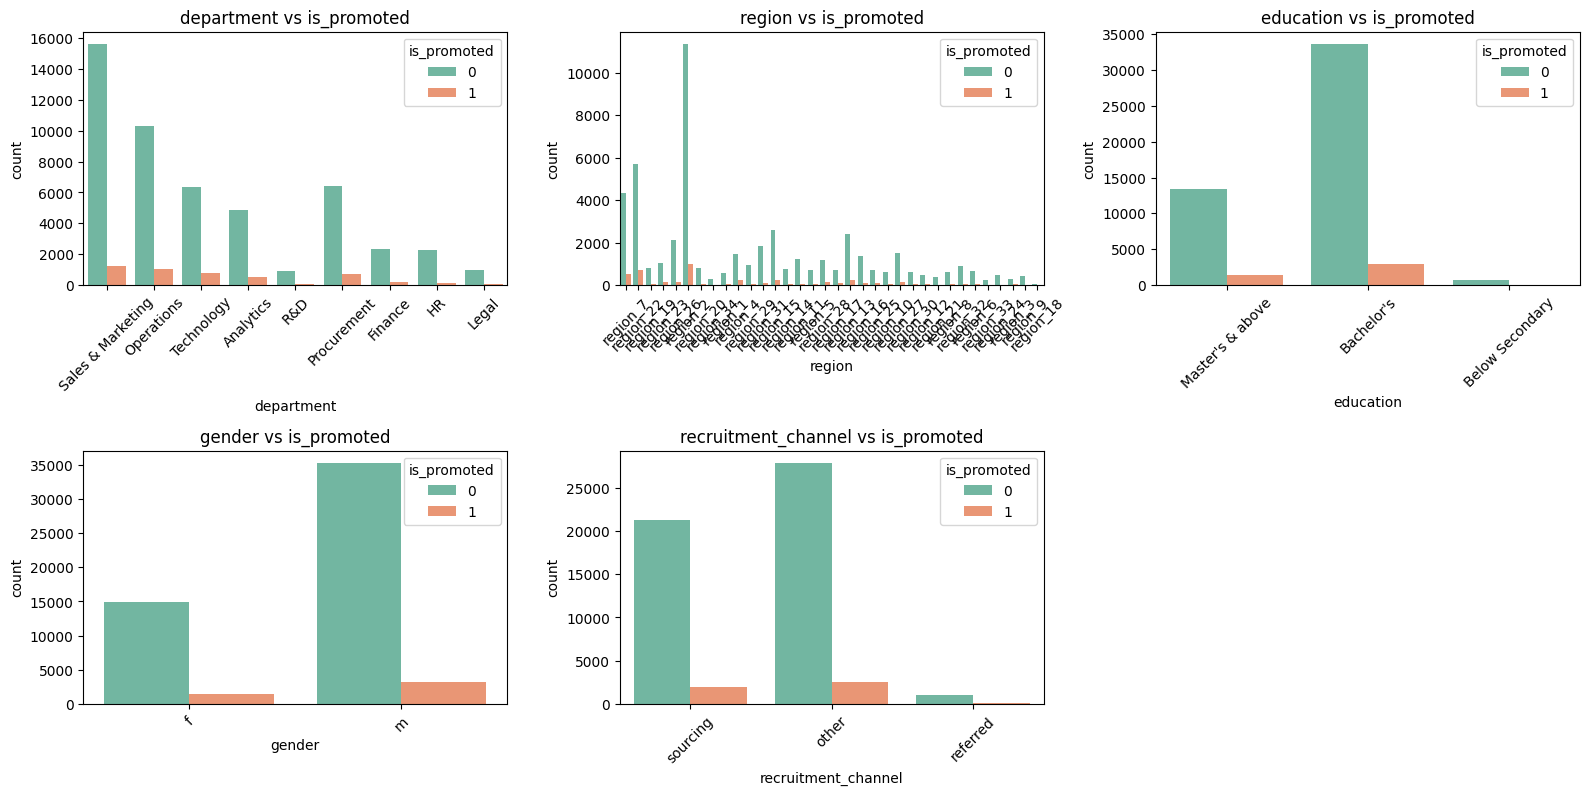

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 24))

# Plot bar plots for each categorical feature against is_promoted
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=data[feature], hue=data['is_promoted'],palette="Set2")
    plt.title(f'{feature} vs is_promoted')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-17-48e01fad7d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['is_promoted'], y=data[feature],palette="pastel")
<ipython-input-17-48e01fad7d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['is_promoted'], y=data[feature],palette="pastel")
<ipython-input-17-48e01fad7d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['is_promoted'], y=data[feature],palette="pastel")
<ipython-input-17-48e01fad7d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

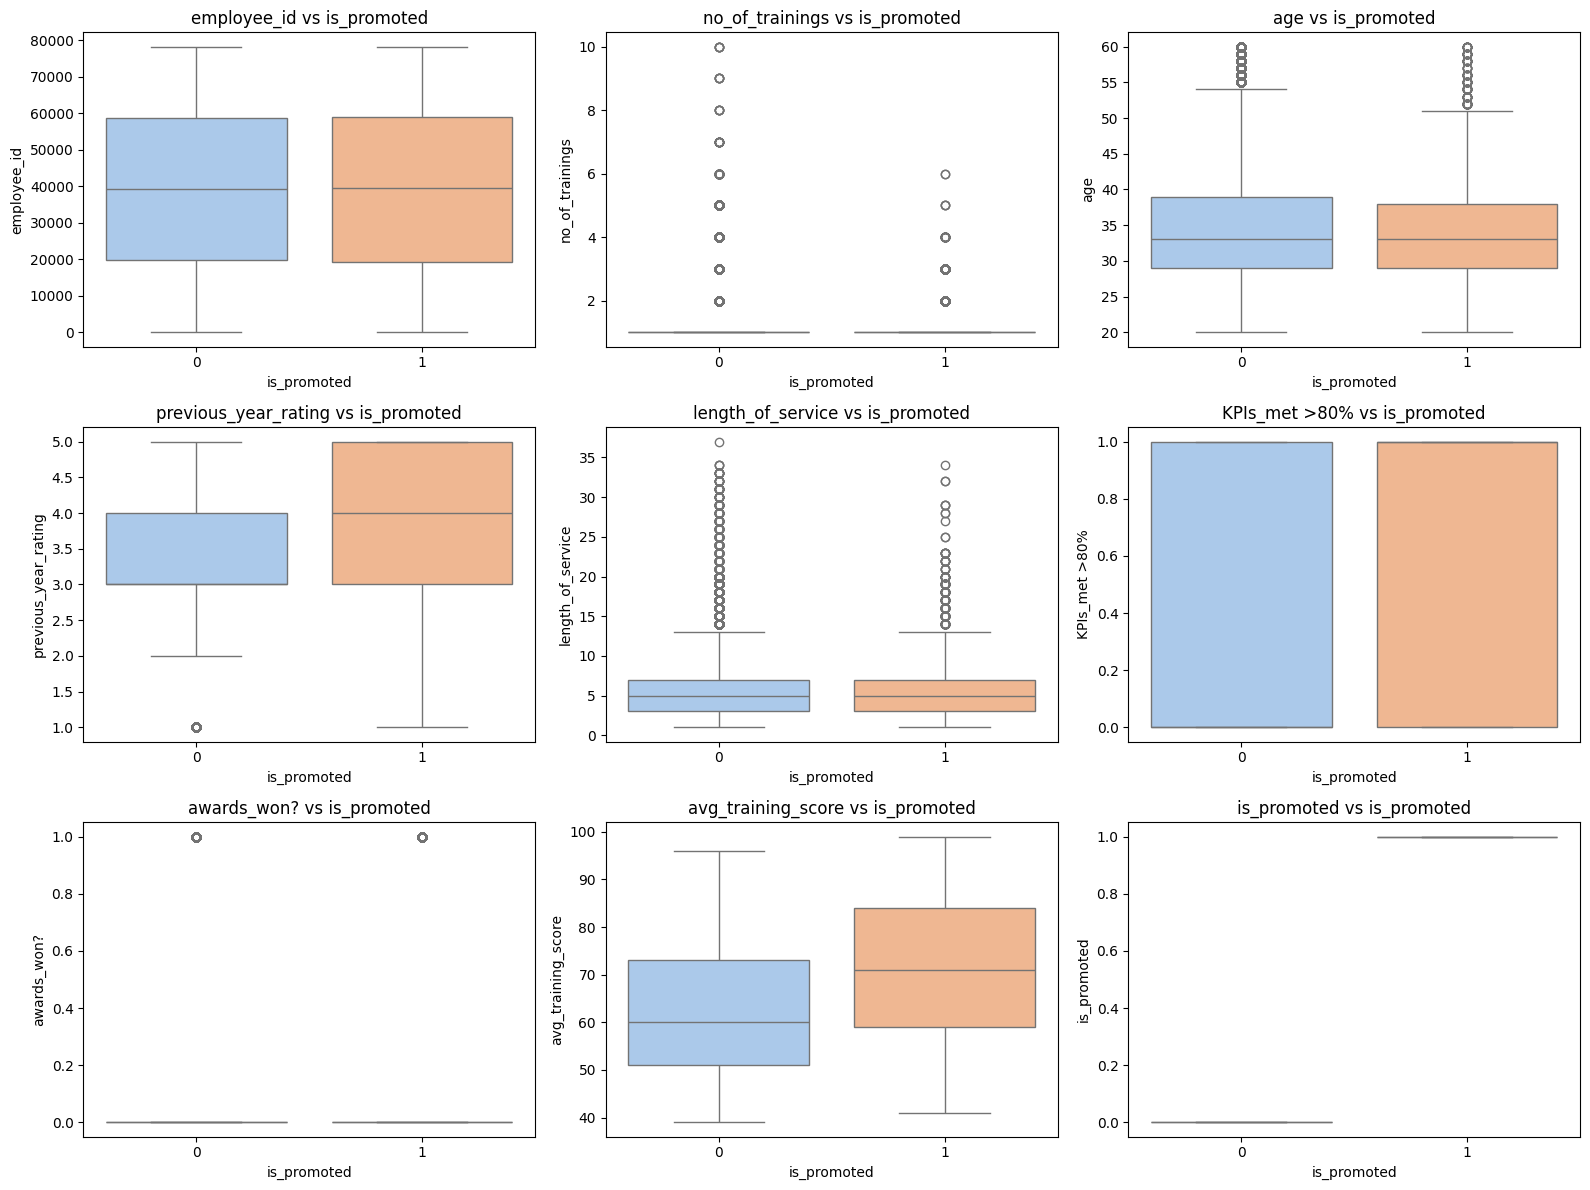

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot box plots for each numerical feature against is_promoted
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data['is_promoted'], y=data[feature],palette="pastel")
    plt.title(f'{feature} vs is_promoted')

plt.tight_layout()
plt.show()


# Data Preprocessing

Handling Missing Values

In [19]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [20]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].mean())
data['education']=data['education'].fillna(data['education'].mode()[0])
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


Encoding

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [22]:
# To remove region column values prefiex as below
data['region'] = data['region'].str.replace('region_','')
data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [23]:
data['region'] = data['region'].astype('int') # Correct usage to convert to integer

In [24]:
# To replace gender categorical variable value as 1 for 'm' and 0 for 'f'
gender_mapping = {'m': 1, 'f': 0}
data['gender'] = data['gender'].map(gender_mapping)

One Hot Encoding

In [25]:
data = pd.get_dummies(data, columns = ['department','education','recruitment_channel'],drop_first=True)
data.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,7,0,1,35,5.0,8,1,0,49,...,False,False,False,False,True,False,False,True,False,True
1,65141,22,1,1,30,5.0,4,0,0,60,...,False,True,False,False,False,False,False,False,False,False
2,7513,19,1,1,34,3.0,7,0,0,50,...,False,False,False,False,True,False,False,False,False,True
3,2542,23,1,2,39,1.0,10,0,0,50,...,False,False,False,False,True,False,False,False,False,False
4,48945,26,1,1,45,3.0,2,0,0,73,...,False,False,False,False,False,True,False,False,False,False


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   region                        54808 non-null  int64  
 2   gender                        54808 non-null  int64  
 3   no_of_trainings               54808 non-null  int64  
 4   age                           54808 non-null  int64  
 5   previous_year_rating          54808 non-null  float64
 6   length_of_service             54808 non-null  int64  
 7   KPIs_met >80%                 54808 non-null  int64  
 8   awards_won?                   54808 non-null  int64  
 9   avg_training_score            54808 non-null  int64  
 10  is_promoted                   54808 non-null  int64  
 11  department_Finance            54808 non-null  bool   
 12  department_HR                 54808 non-null  bool   
 13  d

Modelling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate the features and the target variable
X = data.drop(columns = ['is_promoted'])
y = data['is_promoted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score # Import f1_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store model names and F1 scores
model_f1_scores = {}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    model_f1_scores[model_name] = f1

# Convert the dictionary to a DataFrame
f1_df = pd.DataFrame(list(model_f1_scores.items()), columns=['Model', 'F1 Score'])

# Sort the DataFrame by F1 Score in descending order
f1_df = f1_df.sort_values(by='F1 Score', ascending=False) # Sort the DataFrame

print(f1_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  F1 Score
2    Gradient Boosting  0.464226
1        Random Forest  0.446844
3        Decision Tree  0.414916
0  Logistic Regression  0.000000


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score



# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store model names and accuracies
model_accuracies = {}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print(accuracy_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy
2    Gradient Boosting  0.941252
1        Random Forest  0.938880
0  Logistic Regression  0.917168
3        Decision Tree  0.897646


# Fine Tuning

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from scipy.stats import uniform, randint

# Step 1: Split your dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Define a narrow hyperparameter search space
param_dist = {
    'n_estimators': randint(80, 120),
    'learning_rate': uniform(0.05, 0.1),
    'max_depth': randint(3, 5),
    'subsample': uniform(0.8, 0.2),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3)
}

# Step 3: Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Step 4: Initialize RandomizedSearchCV with F1 score and reduced time settings
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=10,              # Reduced number of iterations
    cv=2,                   # Fewer CV folds for speed
    scoring='f1',           # Use 'f1_macro' if multi-class
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Step 5: Train the model using randomized search
random_search.fit(X_train, y_train)

# Step 6: Best estimator and parameters
best_gb = random_search.best_estimator_
print("\nBest Parameters Found:\n", random_search.best_params_)

# Step 7: Predict and evaluate
y_pred = best_gb.predict(X_test)

# Step 8: F1 score and report
print(f"\nF1 Score on Test Set: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 10 candidates, totalling 20 fits

Best Parameters Found:
 {'learning_rate': np.float64(0.14385527090157502), 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 112, 'subsample': np.float64(0.8608484485919076)}

F1 Score on Test Set: 0.5012

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.95      0.34      0.50       934

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962


Confusion Matrix:
 [[10011    17]
 [  616   318]]


For test dataset

In [31]:
# loading the dataset and saving it as data_test
data_test = pd.read_csv('/content/test_2umaH9m.csv')


In [32]:
data_test.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [33]:
data_test.shape

(23490, 13)

In [34]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [35]:
data_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [36]:
data_test.describe(include='object')

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,16596,13078


In [37]:
data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [38]:
data_test['previous_year_rating']=data_test['previous_year_rating'].fillna(data_test['previous_year_rating'].mean())
data_test['education']=data_test['education'].fillna(data_test['education'].mode()[0])
data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


Encoding

In [39]:
# To remove region column values prefiex as below
data_test['region'] = data_test['region'].str.replace('region_','')
data_test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,26,Bachelor's,m,sourcing,1,24,3.339146,1,1,0,77
1,74430,HR,4,Bachelor's,f,other,1,31,3.000000,5,0,0,51
2,72255,Sales & Marketing,13,Bachelor's,m,other,1,31,1.000000,4,0,0,47
3,38562,Procurement,2,Bachelor's,f,other,3,31,2.000000,9,0,0,65
4,64486,Finance,29,Bachelor's,m,sourcing,1,30,4.000000,7,0,0,61


In [40]:
data_test['region'] = data_test['region'].astype('int') # Correct usage to convert to integer

In [41]:
# To replace gender categorical variable value as 1 for 'm' and 0 for 'f'
gender_mapping = {'m': 1, 'f': 0}
data_test['gender'] = data_test['gender'].map(gender_mapping)

In [42]:
data_test = pd.get_dummies(data_test, columns = ['department','education','recruitment_channel'],drop_first=True)
data_test.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,26,1,1,24,3.339146,1,1,0,77,...,False,False,False,False,False,True,False,False,False,True
1,74430,4,0,1,31,3.000000,5,0,0,51,...,False,False,False,False,False,False,False,False,False,False
2,72255,13,1,1,31,1.000000,4,0,0,47,...,False,False,False,False,True,False,False,False,False,False
3,38562,2,0,3,31,2.000000,9,0,0,65,...,False,False,True,False,False,False,False,False,False,False
4,64486,29,1,1,30,4.000000,7,0,0,61,...,False,False,False,False,False,False,False,False,False,True


In [43]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   23490 non-null  int64  
 1   region                        23490 non-null  int64  
 2   gender                        23490 non-null  int64  
 3   no_of_trainings               23490 non-null  int64  
 4   age                           23490 non-null  int64  
 5   previous_year_rating          23490 non-null  float64
 6   length_of_service             23490 non-null  int64  
 7   KPIs_met >80%                 23490 non-null  int64  
 8   awards_won?                   23490 non-null  int64  
 9   avg_training_score            23490 non-null  int64  
 10  department_Finance            23490 non-null  bool   
 11  department_HR                 23490 non-null  bool   
 12  department_Legal              23490 non-null  bool   
 13  d

In [44]:
data_test2 = data_test.copy()

In [45]:
pred=best_gb.predict(data_test2)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [46]:
result=pd.DataFrame({'employee_id': data_test2['employee_id'],'is_promoted':pred})
result

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [47]:
result['is_promoted'].value_counts()

,count
is_promoted,
0,22803
1,687


In [48]:
#save dataframe as csv
result.to_csv('sample1.csv', index=False)